In [31]:
import pandas as pd 
import nfl_data_py as nfl
import matplotlib.pyplot as plt 
from matplotlib import style 

pd.set_option('display.max.columns', None)

In [29]:
year = 2020

In [27]:
df = nfl.import_ngs_data(stat_type='passing')

In [28]:
df

,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
0,2016,REG,0,Matt Ryan,QB,ATL,2.640436,7.211903,8.972697,-1.760793,20.973783,61.429512,-0.169625,534,4944,38,7,117.127029,373,69.850187,62.408454,7.441733,21.259711,63.017923,00-0026143,Matthew,Ryan,2,M.Ryan
1,2016,REG,0,Eli Manning,QB,NYG,2.527473,5.437374,8.191990,-2.754616,19.732441,53.598400,-0.408344,598,4027,26,16,86.022854,377,63.043478,64.567929,-1.524451,20.702627,57.601267,00-0022803,Eli,Manning,10,E.Manning
2,2016,REG,0,Aaron Rodgers,QB,GB,2.874600,6.272394,9.238016,-2.965622,16.393443,60.821912,0.779000,610,4428,40,7,104.187158,401,65.737705,62.221197,3.516508,23.434480,70.765238,00-0023459,Aaron,Rodgers,12,A.Rodgers
3,2016,REG,0,Marcus Mariota,QB,TEN,2.751991,7.744855,9.780976,-2.036121,19.955654,53.671723,0.754368,451,3426,26,9,95.634701,276,61.197339,59.038790,2.158549,23.550859,55.797424,00-0032268,Marcus,Mariota,8,M.Mariota
4,2016,REG,0,Russell Wilson,QB,SEA,2.606104,7.167756,9.189780,-2.022024,17.948718,59.782755,-0.050587,546,4219,21,11,92.582418,353,64.652015,59.605584,5.046430,23.137055,61.277761,00-0029263,Russell,Wilson,3,R.Wilson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4089,2022,POST,21,Joe Burrow,QB,CIN,2.653488,5.724231,7.924865,-2.200634,21.951220,42.817959,-1.102162,41,270,1,2,70.172764,26,63.414634,59.843121,3.571513,22.571798,44.879369,00-0036442,Joe,Burrow,9,J.Burrow
4090,2022,POST,21,Jalen Hurts,QB,PHI,2.894600,4.248000,8.940000,-4.692000,16.000000,36.346341,0.565000,25,121,0,0,72.250000,15,60.000000,60.882896,-0.882896,23.167578,47.861153,00-0036389,Jalen,Hurts,1,J.Hurts
4091,2022,POST,21,Patrick Mahomes,QB,KC,2.939558,4.833793,6.250976,-1.417183,9.302326,39.176016,-2.407561,43,326,2,0,105.377907,29,67.441860,69.127680,-1.685819,19.153173,49.895653,00-0033873,Patrick,Mahomes,15,P.Mahomes
4092,2022,POST,23,Patrick Mahomes,QB,KC,2.689000,4.342857,5.914000,-1.571143,7.407407,31.477357,-2.126000,27,182,3,0,131.790123,21,77.777778,68.630475,9.147302,18.186809,47.231262,00-0033873,Patrick,Mahomes,15,P.Mahomes


In [32]:
df = df[df['week'] == 0]
df = df[df['season'] == year]
df = df.reset_index()

In [33]:
average_ttt = df['avg_time_to_throw'].mean()
average_cpae = df['completion_percentage_above_expectation'].mean()

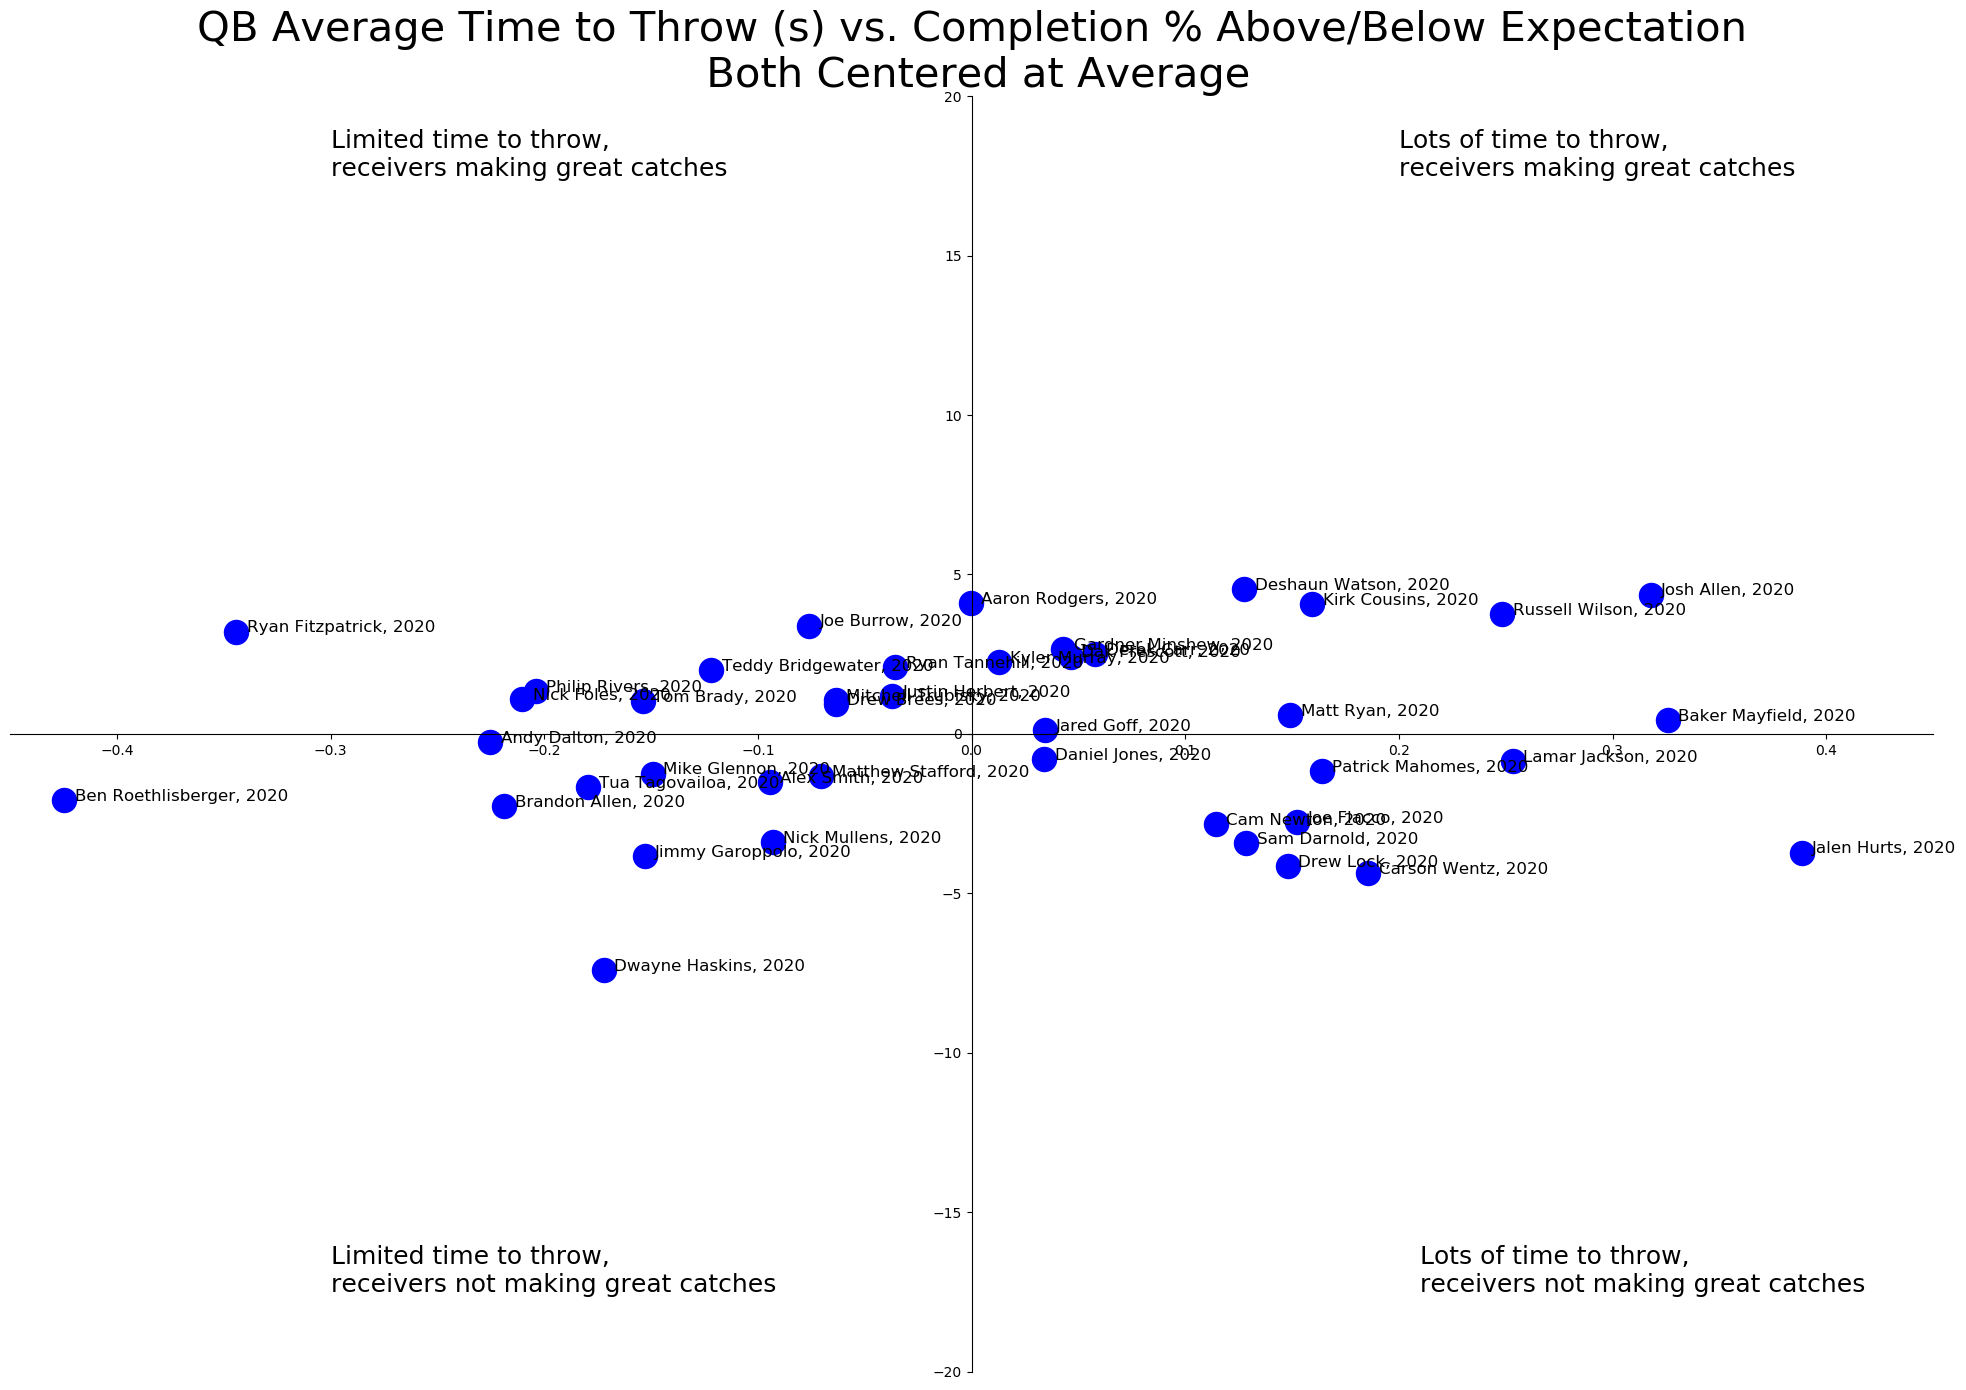

In [34]:
# Visualize the data

# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [20, 14]
plt.rcParams["figure.autolayout"] = True


# Initialize empty lists for x,y 
x = []
y = []

# Define the x and y variables
for qb in df.index:
    x.append(df['avg_time_to_throw'][qb] - average_ttt)
    y.append(df['completion_percentage_above_expectation'][qb] - average_cpae)
    
# Put x,y into dictionary
xy = pd.DataFrame({'x' : x, 'y' : y})

# Define the plot
fig, ax = plt.subplots()

ax.scatter(xy['x'], xy['y'], s=300, c='blue')

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Set x and y axis limits
plt.xlim((-0.45,0.45))
plt.ylim((-20,20))


# Annotate with QB name and year
for nameyear in xy.index:
    plt.annotate(f"{df['player_display_name'][nameyear]}, {df['season'][nameyear]}",\
                 (xy['x'][nameyear] + 0.005,
                  xy['y'][nameyear] - 0.025),
                  fontsize=12)

# Annotate Quadrants
plt.annotate('Lots of time to throw,\nreceivers making great catches', (0.2,17.5), fontsize=18)
plt.annotate('Limited time to throw,\nreceivers making great catches', (-0.3,17.5), fontsize=18)
plt.annotate('Limited time to throw,\nreceivers not making great catches', (-0.3,-17.5), fontsize=18)
plt.annotate('Lots of time to throw,\nreceivers not making great catches', (0.21,-17.5), fontsize=18)
    

# Add a title
plt.title(f'QB Average Time to Throw (s) vs. Completion % Above/Below Expectation\n Both Centered at Average',
         fontdict={'fontsize': 30})

    
# Style the chart
plt.show()